In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
## the length
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.TAUX.nc')
lont = data1.variables['ULONG'][:600,500:1500]
latt = data1.variables['ULAT'][:600,500:1500]
latt[latt == -1.0] = np.nan

a = np.arange(0,600)
import math
#math.cos(math.radians(latt[:,3][399]))
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[:,700][j]))

In [3]:
wholedis = wholedis * 1000 # 地球一度的距离(m)

In [23]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.UVEL.nc')
plotvar = data.variables['UVEL'][0,:,:]
u = plotvar[20,:600,500:1500]
lontu = data1.variables['ULONG'][:600,500:1500]
lattu = data1.variables['ULAT'][:600,500:1500]
lattu[lattu == -1.0] = np.nan

u = u/100 # m/s

In [24]:
u[:,0]

masked_array(data=[-0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009999999776482582, -0.009999999776482582,
                   -0.009

In [25]:
### replace all nan to 0
where_are_nan = np.isnan(u)
u[where_are_nan] = 0

In [26]:
u[u == -0.009999999776482582]=0

In [28]:
where_are_nan = np.isnan(u)
u[where_are_nan] = 0

In [29]:
u[:,0]

masked_array(data=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                   0.0, 0.0, 0.0, --, --, --, --, --, 0.0, 0.0,
                   -0.010923798196017742, 0.022363144904375076,
                   0.0486367903649807, 0.06297734379768372,
                   0.05191691964864731, 0.018542658537626266,
                   -0.0066635035909712315, -0.014813873916864395,
                   -0.013790369965136051, -0.007588617969304323,
                   -0.004484866745769978, -0.0074998317286372185,
                   -0.0112341083586

In [5]:
        ###### u * dz
        a = np.arange(0,599)
        A1= np.zeros([600,1000])
        for i in a:
            A1[i,:] = u[i,:]*(latt[i+1,:]-latt[i,:])*110.95 * 1000 #(unit m)
        ###################################

In [6]:
        ####################################
        ######  volume transport
        #a = np.arange(0,599)
        #b = np.arange(0,1000)
        #A1= np.zeros([600,1000])
        #for j in a:
            #for i in b:
                #A1[j,i] = u[j,i]*(latt[j+1,i]-latt[j,i])*wholedis[j]
        #####################################
        #####unit (m^3/s)

In [7]:
### replace all nan to 0
where_are_nan = np.isnan(A1)
A1[where_are_nan] = 0

In [8]:
A1[A1>1000000000]=0

In [9]:
num = np.arange(1,599,1)
num.shape

(598,)

In [10]:
A1.shape

(600, 1000)

In [11]:
stream = np.zeros([600,1000])
count = 0

stream[0,:] = A1[0,:]
for i in num:
    stream[count+1,:] = stream[count,:]+A1[i,:]
    count = count + 1
    

In [12]:
stream[stream >0]= np.nan

In [13]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [-60000000,-50000000,-40000000,-30000000,-20000000,-10000000,0,5000000,10000000,13000000,16000000,17000000,23000000,25000000]
        #nice_levels = [0,2,4,6,8,10,11,12,13]
        #colorlevel = [0,20,40,60,80,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 0, 'Streamfunction(5m,0175-09)')

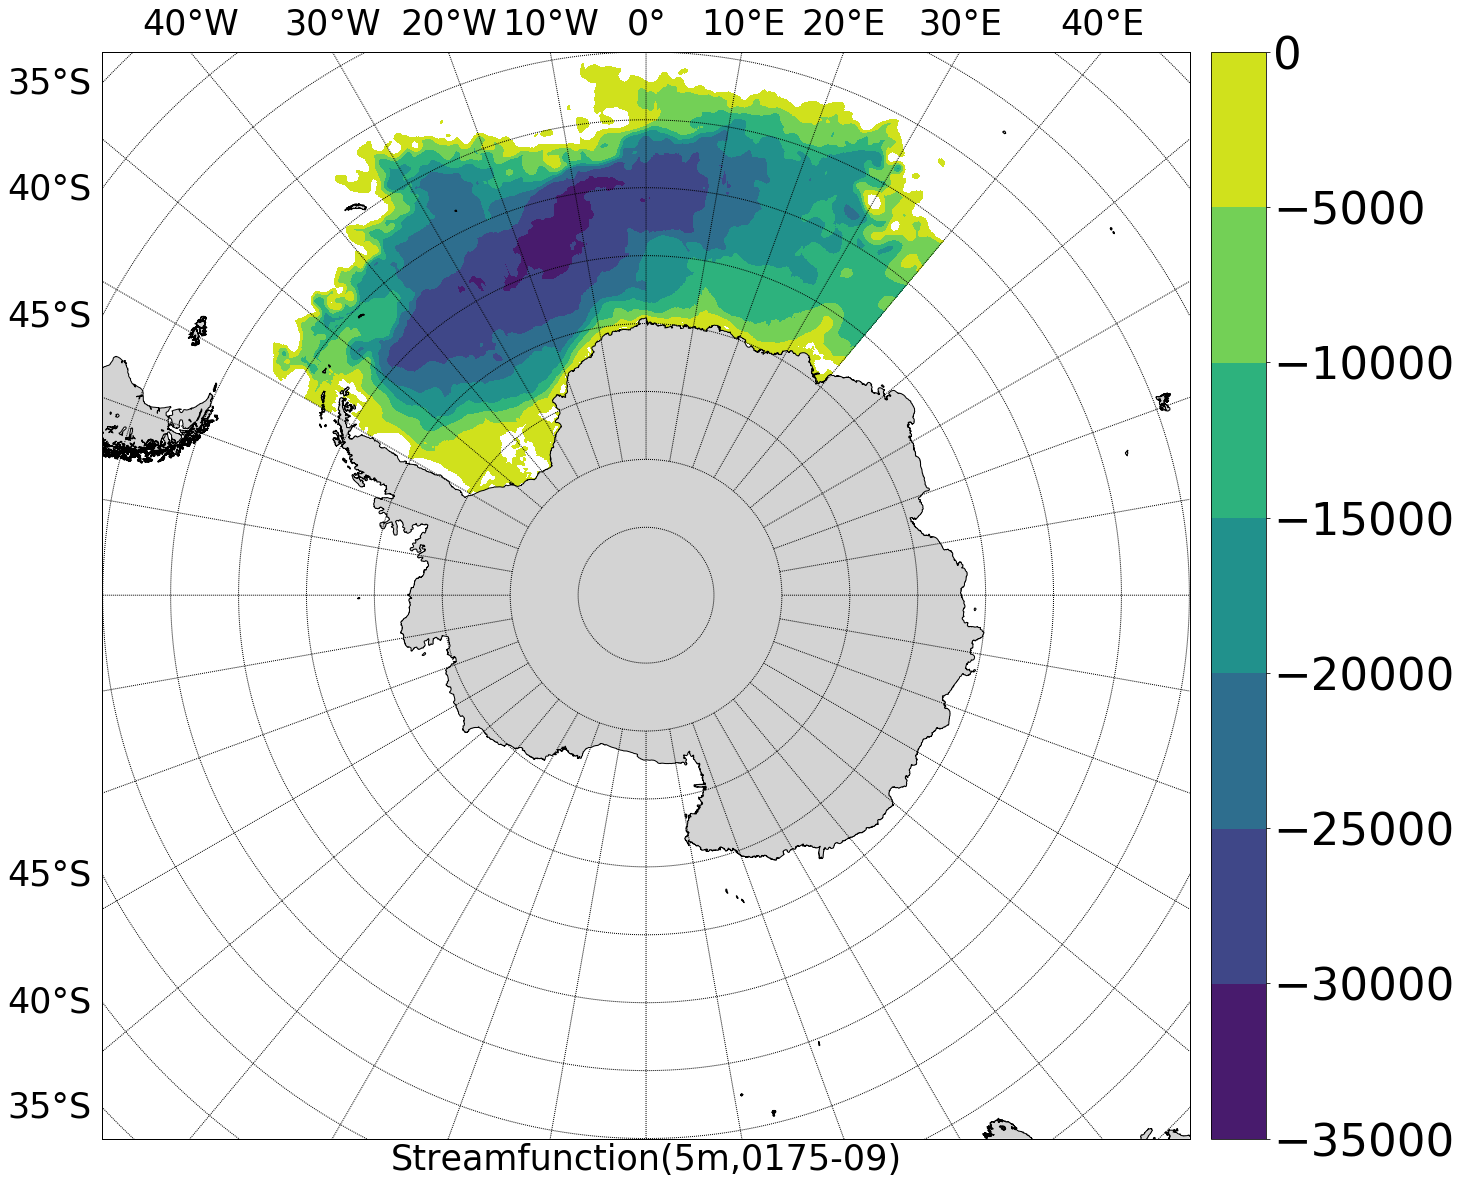

In [15]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lontu,lattu)
#lw = 5*U / U.max()

CP = map.contourf(x[:,:],y[:,:],stream[:,:])#,cmap = new_cmap,levels = nice_levels,extend='both')
#MP = map.contour(x,y,stream,levels = nice_levels)
#plt.clabel(MP, inline=1, fontsize=10)
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=45)
plt.xlabel("Streamfunction(5m,0175-09)",**my_font)